<a href="https://colab.research.google.com/github/FIngul98/Loan_Dataset/blob/main/Random_Forest_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn
import sys
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import plot_confusion_matrix

In [2]:
url = 'https://raw.githubusercontent.com/FIngul98/Loan_Dataset/main/loan_data.csv'
loan_data= pd.read_csv(url)
loan_data

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,all_other,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0,1
9574,0,all_other,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0,1
9575,0,debt_consolidation,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0,1
9576,0,home_improvement,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0,1


In [3]:
#We are dropping the column "purpose" due to issues in the on hot encoding code and errors of infinity values.

loan_data.drop(columns='purpose',axis=1, inplace=True)


In [4]:
#Also it was easier for us to work with the features in the '_' format
loan_data.columns = [c.replace('.', '_') for c in loan_data.columns]

In [5]:
#Here we are preparing to split the data by defining our X features.
X = loan_data.iloc[:,:-1]
X

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [6]:
#Here we are preparing to split the data by defining our target value.
y = loan_data['not_fully_paid']
y

0       0
1       0
2       0
3       0
4       0
       ..
9573    1
9574    1
9575    1
9576    1
9577    1
Name: not_fully_paid, Length: 9578, dtype: int64

In [7]:
#Tran_test split is done before exploratory data analysis
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [8]:
# X_test data set is downloaded and set aside from the model for now
X_test.to_csv('./X_test_data.csv')

In [9]:
# y_test data set is downloaded and set aside from the model for now
y_test.to_csv('./y_test_data.csv')

In [10]:
#All our features appear to follow normal distribution except "revol_bal." We have to feature engineer "revol_bal" in our next step.
#Refer to Decision Tree model for visualization.
loan_data['log_revol_bal'] = np.log(loan_data['revol_bal'])
loan_data.drop(columns='revol_bal', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [11]:
#We create loan_ros for the after over-sampling data.
loan_ros = loan_data[['credit_policy', 'int_rate', 'installment',	'log_annual_inc', 'dti', 'fico', 'days_with_cr_line',	'revol_util',	'inq_last_6mths',	'delinq_2yrs', 'pub_rec', 'log_revol_bal', 'not_fully_paid']]
print(loan_ros['not_fully_paid'].value_counts(), "\n")

0    8045
1    1533
Name: not_fully_paid, dtype: int64 



In [12]:
from imblearn.over_sampling import RandomOverSampler

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


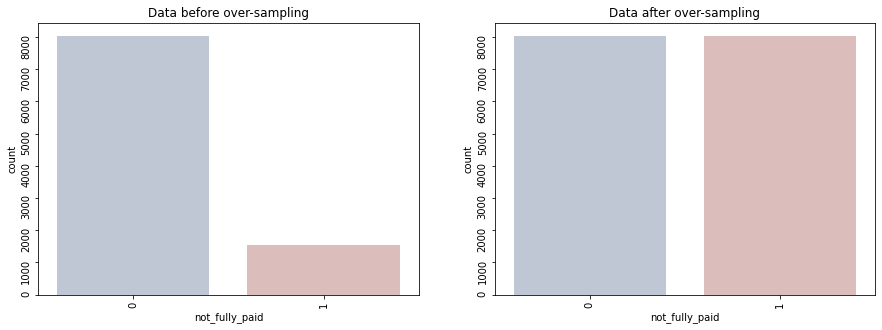

Data before over-sampling
0    8045
1    1533
Name: not_fully_paid, dtype: int64 

Data after over-sampling
0    8045
1    8045
Name: not_fully_paid, dtype: int64


In [13]:
# over-sampling. We define X and y for loan_ros using the iloc function.
X = loan_ros.iloc[:,:-1]
y = loan_ros.iloc[:,-1]

ros = RandomOverSampler(random_state=42)
x_ros, y_ros = ros.fit_resample(X, y)

loan_ros = x_ros
loan_ros['not_fully_paid'] = y_ros


#Now we want to visualize the after and before over-sampling data.
fig, ax = plt.subplots(1,2, figsize=(15,5))

sns.countplot('not_fully_paid', data=loan_data, ax=ax[0], palette="vlag")
ax[0].tick_params(labelrotation=90)
ax[0].set_title("Data before over-sampling")

sns.countplot('not_fully_paid', data=loan_ros, ax=ax[1], palette="vlag")
ax[1].tick_params(labelrotation=90)
ax[1].set_title("Data after over-sampling")

plt.show()

print("Data before over-sampling")
print(loan_data['not_fully_paid'].value_counts(), "\n")

print("Data after over-sampling")
print(loan_ros['not_fully_paid'].value_counts())

In [14]:
#RandomOverSampler corrects the imbalance between 0's and 1's
loan_ros.value_counts('not_fully_paid')

not_fully_paid
0    8045
1    8045
dtype: int64

In [15]:
#Specifying what type of values our data set includes. This will make our fit and the RFE model easier
types = loan_data.select_dtypes(['int64', 'float64', 'bool']).columns

In [16]:
#Importing our test data set
X_test = pd.read_csv('/content/X_test_data.csv')

In [17]:
#Removing the column "Unnamed"
X_test.drop(columns='Unnamed: 0', axis=1, inplace=True)


In [18]:
#Importing our test data set
y_test = pd.read_csv('/content/y_test_data.csv')

In [19]:
#Removing the column "Unnamed"
y_test.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [20]:
#Modifying the scale of feature "revol_bal" to a log scale for it to follow normal distribution.
X_test['log_revol_bal'] = np.log(X_test['revol_bal'])
X_test.drop(columns='revol_bal', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [21]:
#Importing RFE model
from sklearn.feature_selection import RFE

In [22]:
#Here we are defining our model and reiterating the X and y features.
loan_model = loan_ros
X = loan_model.iloc[:,:-1].values
y = loan_model.iloc[:,-1].values

In [23]:
#When we were feature engineering the log_revol_bal would give us infinity values.
#The solution is to substitute with standardized value using the formula below
X_1 = np.nan_to_num(X, posinf=True, neginf=True)

In [24]:
X_test = np.nan_to_num(X_test,posinf=True, neginf=True)

In [25]:
#Checking to see if we are still getting infinity values, which we are not!
mean = np.mean(X_test)
median = np.median(X_test)
max = np.max(X_test)
 
#print("Array =", X_test)
print("Mean =", mean)
print("Median =", median)
print("Max =", max)

Mean = 471.2737735367681
Median = 9.2054283225658
Max = 16350.0


In [26]:
#Here we are splitting the balanced data set to train the model on the new trained data set
#Further, we do not want to train the model on the new test set so we keep the old
X_train, X_test2, y_train, y_test2 = train_test_split(X_1, y, random_state=42)

In [27]:
for i in range(1,13):

  select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=i)

  select.fit(X_train, y_train)

  mask = select.get_support()

  X_train_rfe = select.transform(X_train)
  X_test_rfe = select.transform(X_test)

  score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

  print("Test score: {:.3f}".format(score), " number of features: {}".format(i))
  #Here we are testing the number of features for our model to find the optimal combination.

Test score: 0.802  number of features: 1
Test score: 0.949  number of features: 2
Test score: 0.970  number of features: 3
Test score: 0.975  number of features: 4
Test score: 0.980  number of features: 5
Test score: 0.985  number of features: 6
Test score: 0.987  number of features: 7
Test score: 0.984  number of features: 8
Test score: 0.983  number of features: 9
Test score: 0.985  number of features: 10
Test score: 0.986  number of features: 11
Test score: 0.984  number of features: 12


In [28]:
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42), n_features_to_select=8)

select.fit(X_train, y_train)

mask = select.get_support()

X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)

score = RandomForestClassifier().fit(X_train_rfe, y_train).score(X_test_rfe, y_test)

print("Test score: {:.3f}".format(score), " number of features: {}".format(8))

features = pd.DataFrame({'features':list(loan_data[types].iloc[:,:-1].columns), 'select':list(mask)})
display(features.T)
features = list(features[features['select']==True]['features'])
print("The selected features are: " "\n")
display(features)

#We find that 8 features provide the highest test score!

Test score: 0.984  number of features: 8


,0,1,2,3,4,5,6,7,8,9,10,11
features,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
select,False,True,True,True,True,True,True,True,False,False,False,True


The selected features are: 



['int_rate',
 'installment',
 'log_annual_inc',
 'dti',
 'fico',
 'days_with_cr_line',
 'revol_util',
 'not_fully_paid']

In [29]:
y_pred = select.predict(X_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1987   25]
 [   4  379]]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      2012
           1       0.94      0.99      0.96       383

    accuracy                           0.99      2395
   macro avg       0.97      0.99      0.98      2395
weighted avg       0.99      0.99      0.99      2395



In [31]:
#Precision 0.97, 0.99
#Our model results are much better than our performance metrics of 70% recall and 90% precision!
